# 安装工具包

In [ ]:
!pip install networkx gensim pandas numpy tqdm scikit-learn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx

import pandas as pd
import numpy as np

import random
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline


# 设置中文字体

In [ ]:
# 从 Google API 上下载暂存字体放到暂存文件夹下

!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

--2023-04-03 13:52:49--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  34.3MB/s    in 3.4s    

2023-04-03 13:52:54 (34.3 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  
  inflating:

In [ ]:
# 指定字体
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
 
font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
 
for font_file in font_files:
  font_manager.fontManager.addfont(font_file)
 
plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

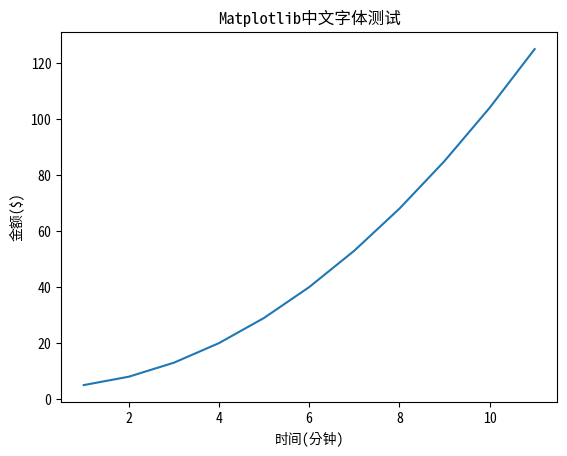

In [ ]:
#测试
import numpy as np
import matplotlib.pyplot as plt
 
 
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
 
x = np.arange(1, 12)
y = x ** 2 + 4
plt.title("Matplotlib中文字体测试")
plt.xlabel("时间(分钟)")
plt.ylabel("金额($)")
plt.plot(x,y)
plt.show()

# 图机器学习

In [ ]:
df = pd.read_csv("seealsology-data.tsv", sep = "\t")
df.head()

,source,target,depth
0,computer vision,computational imaging,1
1,computer vision,computational photography,1
2,computer vision,computer audition,1
3,computer vision,egocentric vision,1
4,computer vision,machine vision glossary,1


In [ ]:
df.shape

(1159, 3)

In [ ]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr = True, create_using = nx.Graph())

In [ ]:
len(G)

940

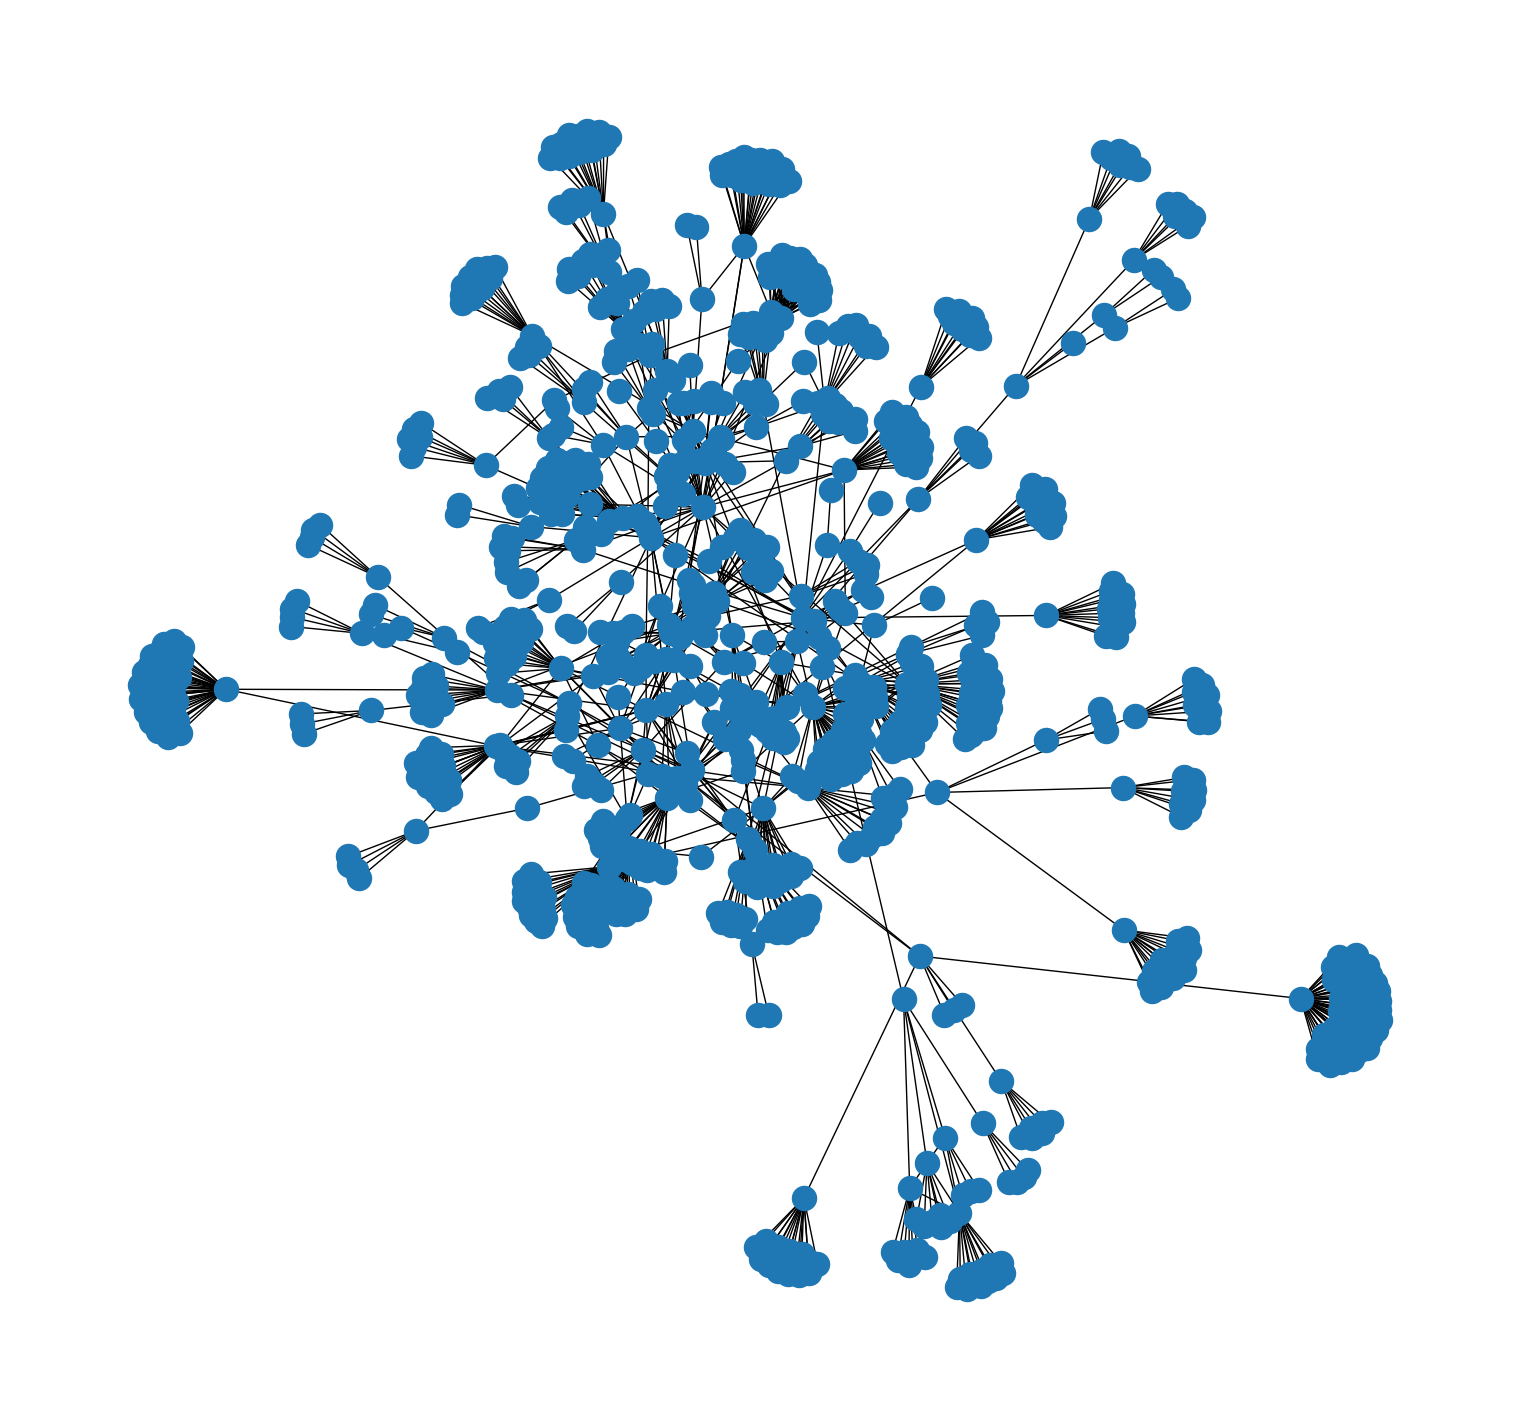

In [ ]:
plt.figure(figsize = (15, 14))
nx.draw(G)
plt.show()

## 生成随机游走序列函数

In [ ]:
def get_randomwalk(node, path_length):

  random_walk = [node]

  for i in range(path_length-1):

    # 统计出周围的节点
    temp = list(G.neighbors(node))
    temp = list(set(temp) - set(random_walk))
    if len(temp) == 0:
      break
    
    # 从temp中选择出接下来游走的节点
    random_node = random.choice(temp)
    random_walk.append(random_node)
    node = random_node

  return random_walk

In [ ]:
all_nodes = list(G.nodes())

In [ ]:
all_nodes

['computer vision',
 'computational imaging',
 'computational photography',
 'computer audition',
 'egocentric vision',
 'machine vision glossary',
 'space mapping',
 'teknomo–fernandez algorithm',
 'vision science',
 'visual agnosia',
 'visual perception',
 'visual system',
 'achromatopsia',
 'akinetopsia',
 'apperceptive agnosia',
 'associative visual agnosia',
 'asthenopia',
 'astigmatism (eye)',
 'color blindness',
 'human echolocation',
 'helmholtz–kohlrausch effect',
 'color balance',
 'magnocellular cell',
 'memory-prediction framework',
 'prosopagnosia',
 'scotopic sensitivity syndrome',
 'recovery from blindness',
 'visual modularity',
 'visual processing',
 'color vision',
 'depth perception',
 'entoptic phenomenon',
 'gestalt psychology',
 'lateral masking',
 'looming',
 'naked eye',
 'machine vision',
 'motion perception',
 'multisensory integration',
 'interpretation (philosophy)',
 'spatial frequency',
 'visual illusion',
 'wikt:sensation',
 'hallucinogen persisting perce

In [ ]:
get_randomwalk('computer vision', 5)

['computer vision',
 'computational photography',
 'time-of-flight camera',
 'kinect']

## 批量生成随机序列作为训练集

In [ ]:
beta = 10 # 每个节点所生成的随机随机序列数
walk_length = 5 # 每个随机游走序列的最大长度

In [ ]:
random_walks = []

for n in tqdm(all_nodes):
  for i in range(beta):
    random_walks.append(get_randomwalk(n, walk_length))

100%|██████████| 940/940 [00:00<00:00, 15730.31it/s]


In [ ]:
len(random_walks)

9400

In [ ]:
random_walks[1]

['computer vision',
 'computer audition',
 'audio signal processing',
 'sound effect']

## 训练Word2Vec模型

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(vector_size = 256, # Embedding维度
                 window = 4, # 窗口宽度
                 sg = 1, # Skip-Gram,使用中心词来预测周围词
                 hs = 0, # 不加入分层softmax
                 negative = 10, # 进行负采样
                 alpha = 0.03, # 设置初始学习率
                 min_alpha = 0.0005,  # 最小的学习率
                 seed = 2 # 设置随机数种子
                 )

In [ ]:
model.build_vocab(random_walks, progress_per = 2)

In [ ]:
model.train(random_walks, total_examples = model.corpus_count, epochs = 50, report_delay = 1)

(1412735, 1645750)

In [ ]:
# 查看某一个特定节点的模型输出结果

model.wv.get_vector('computer vision')

array([-1.46638244e-01,  3.63090158e-01, -2.37190843e-01,  2.44102612e-01,
        3.59154530e-02, -9.77207348e-02, -9.16989371e-02, -1.95538312e-01,
       -3.01447690e-01, -6.24581426e-02,  1.13736819e-02, -8.17396492e-02,
       -1.65268630e-01,  2.06443310e-01,  6.97659049e-03,  3.87680978e-02,
        4.50407248e-03, -5.98089695e-01, -1.47359341e-01,  1.77059531e-01,
        6.50976241e-01, -1.59940347e-01, -1.10901862e-01, -1.91908956e-01,
        5.32041550e-01,  1.30334243e-01,  4.17356998e-01,  5.21310627e-01,
       -3.99306983e-01,  9.81802773e-03,  3.33289981e-01, -1.82985179e-02,
       -1.68771058e-01, -4.38209295e-01, -7.52894999e-03,  1.78716108e-01,
       -2.99215615e-01, -8.55246782e-02, -1.34807885e-01, -8.97868037e-01,
       -4.03965525e-02, -1.23664685e-01, -1.20804548e-01, -3.94356310e-01,
        7.09594607e-01, -3.76313746e-01,  1.25450650e-02,  4.26118374e-01,
        9.98165924e-04, -1.15919784e-01,  5.45859039e-01,  1.38533730e-02,
        4.58227783e-01,  

# PCA降维可视化

In [ ]:
X = model.wv.vectors

In [ ]:
# 使用PCA降维至2维

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
embed_2d = pca.fit_transform(X)

In [ ]:
embed_2d.shape

(940, 2)

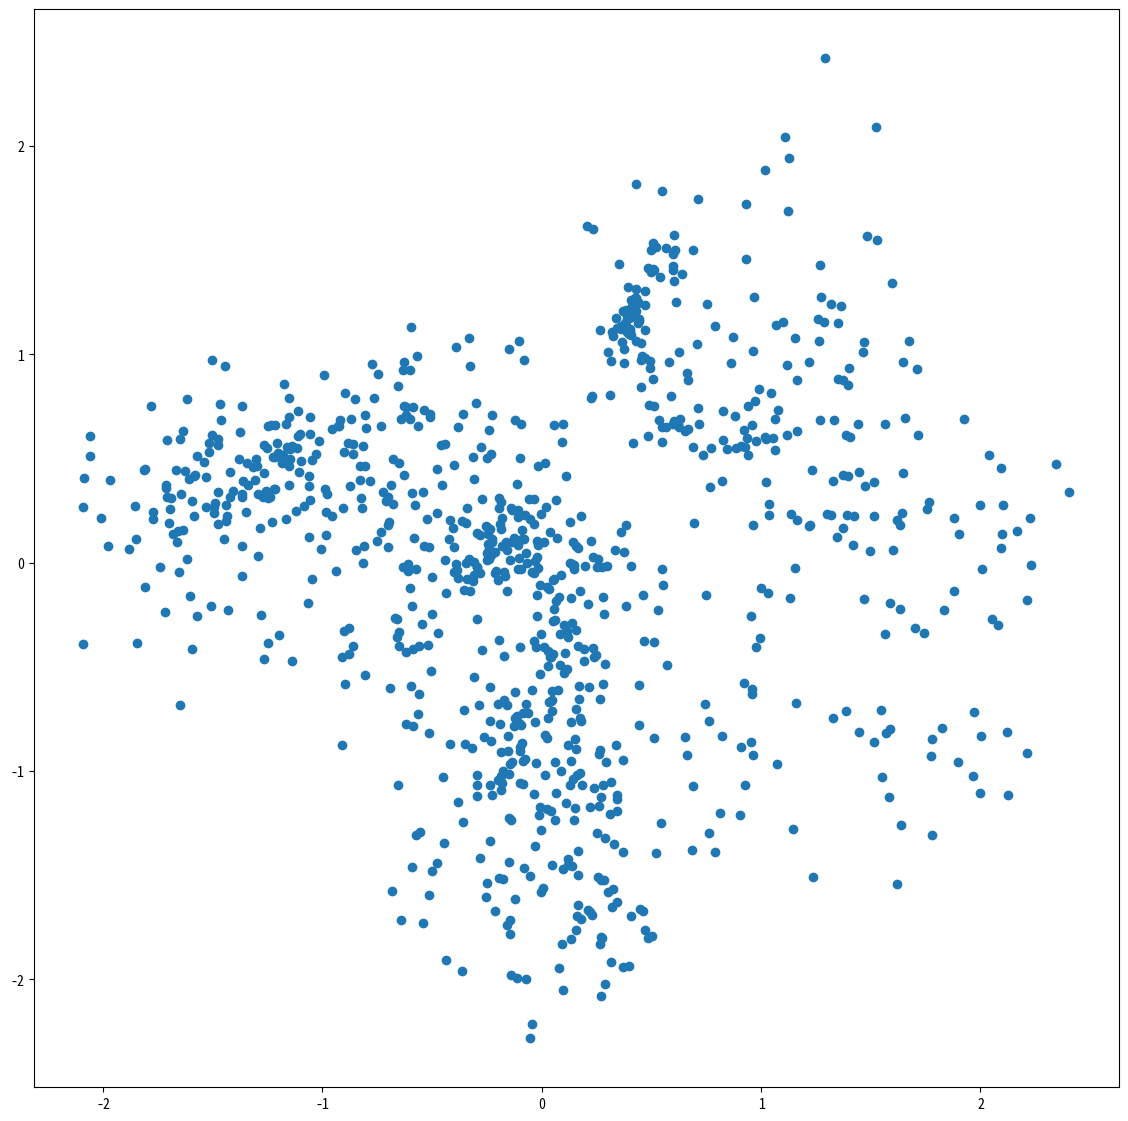

In [ ]:
plt.figure(figsize = (14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

# TSNE降维可视化

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, n_iter = 10000)
embed_2d = tsne.fit_transform(X)

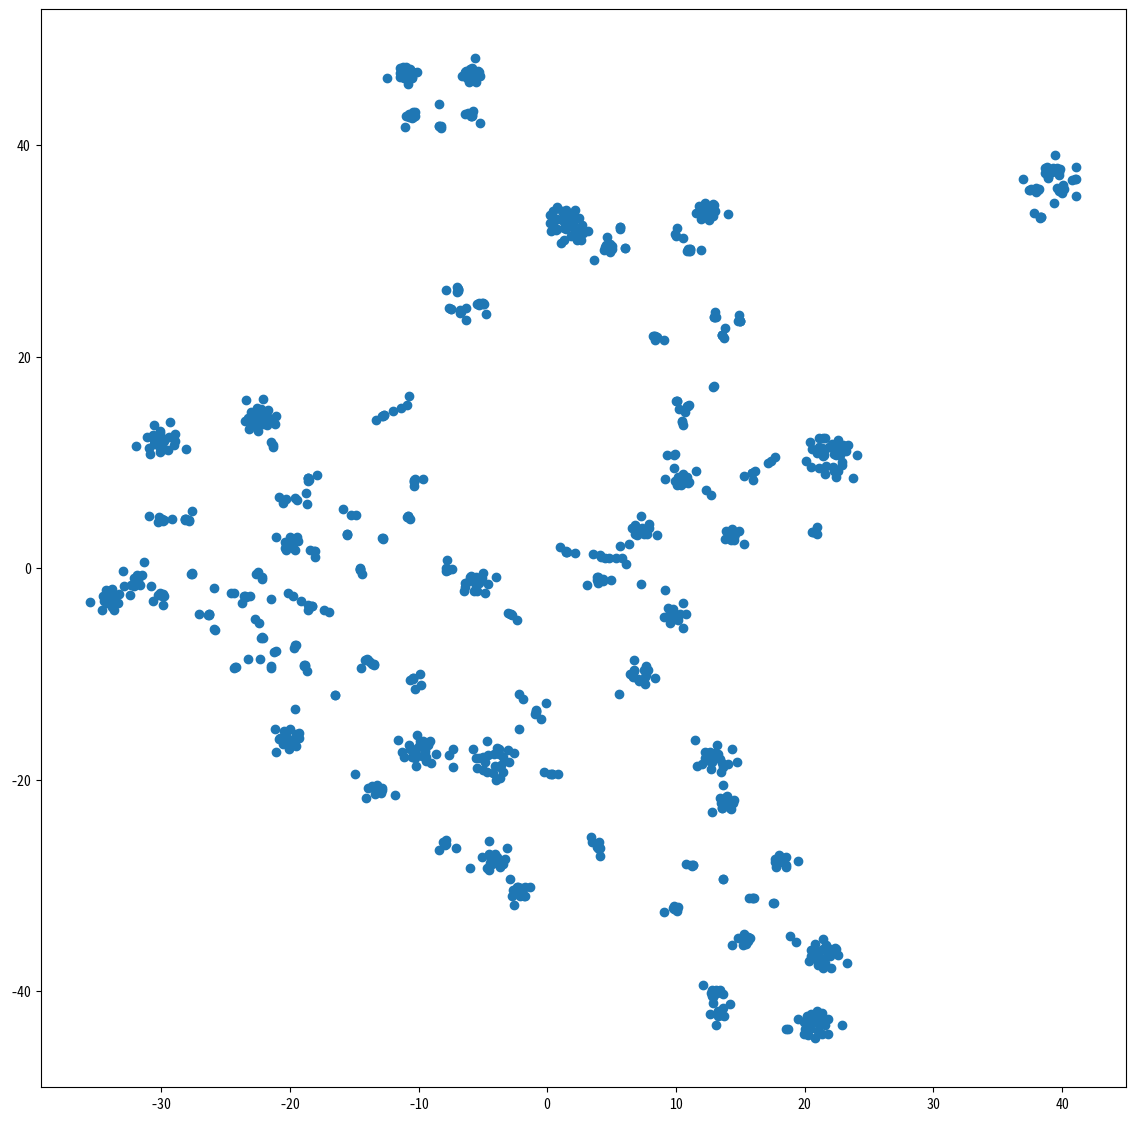

In [ ]:
plt.figure(figsize = (14, 14))
plt.scatter(embed_2d[:, 0],embed_2d[:, 1])
plt.show()